In [123]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import MinMaxScaler
import talib

In [124]:
input_data = 'data00/GAIL.csv'
original_data = pd.read_csv(input_data)
print(original_data.shape)
original_data.head()

(775, 4)


,open,high,low,close
0,152.25,152.35,152.05,152.35
1,152.35,152.95,152.30,152.95
2,152.80,153.15,152.75,153.00
3,153.00,153.15,153.00,153.10
4,153.10,153.15,152.75,152.75


In [125]:
stockData = pd.Series([],dtype='float64') 
start_range = 80
end_range = 81
close_list = original_data.iloc[:, 3].values.tolist()
low_list = original_data.iloc[:, 2].values.tolist()
high_list = original_data.iloc[:, 1].values.tolist()
close = np.asarray(close_list, dtype='float64')
low = np.asarray(low_list, dtype='float64')
high = np.asarray(high_list, dtype='float64')

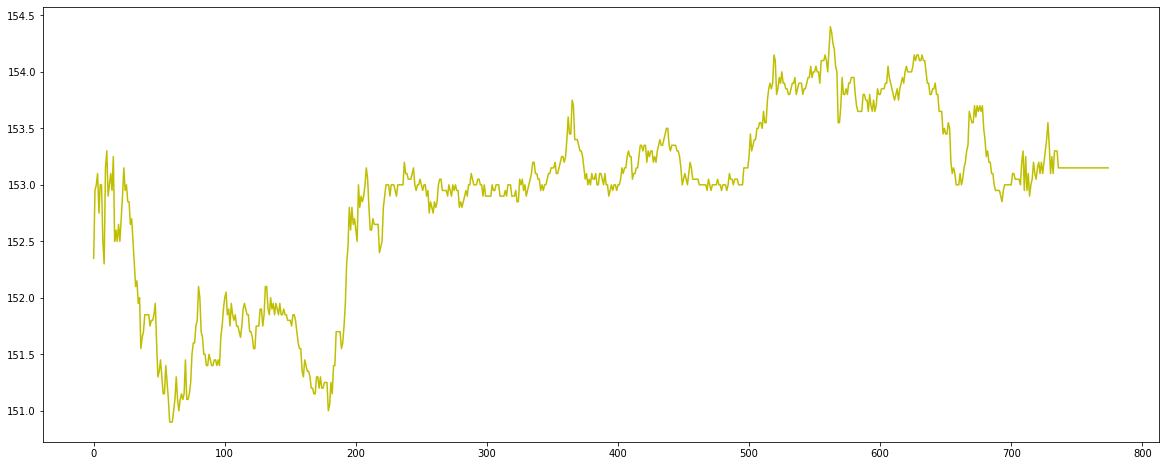

In [126]:
plt.figure(figsize=(20, 8))
plt.plot(close, c='y')

In [127]:
mom = talib.MOM(close, timeperiod=8)
rsi = talib.RSI(close, timeperiod=8)
trix = talib.TRIX(close, timeperiod=8)

In [128]:
scaler = MinMaxScaler(feature_range=(np.nanmin(rsi),np.nanmax(rsi)))
scaled_mom = scaler.fit_transform(mom.reshape(-1,1))
scaled_trix = scaler.fit_transform(trix.reshape(-1,1))

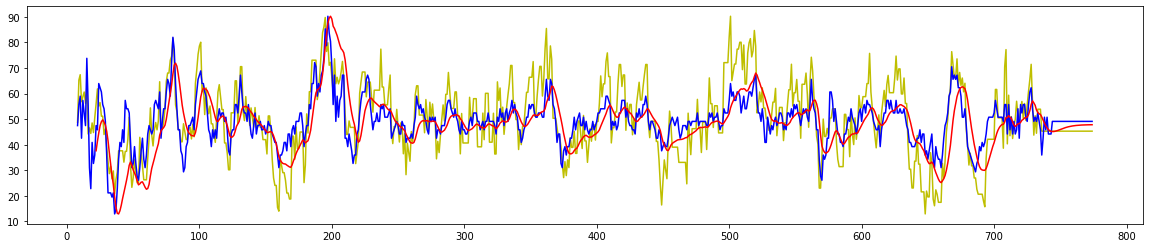

In [129]:
plt.figure(figsize=(20,4))
plt.plot(rsi, c='y')
plt.plot(scaled_mom, c='b')
plt.plot(scaled_trix, c='r')

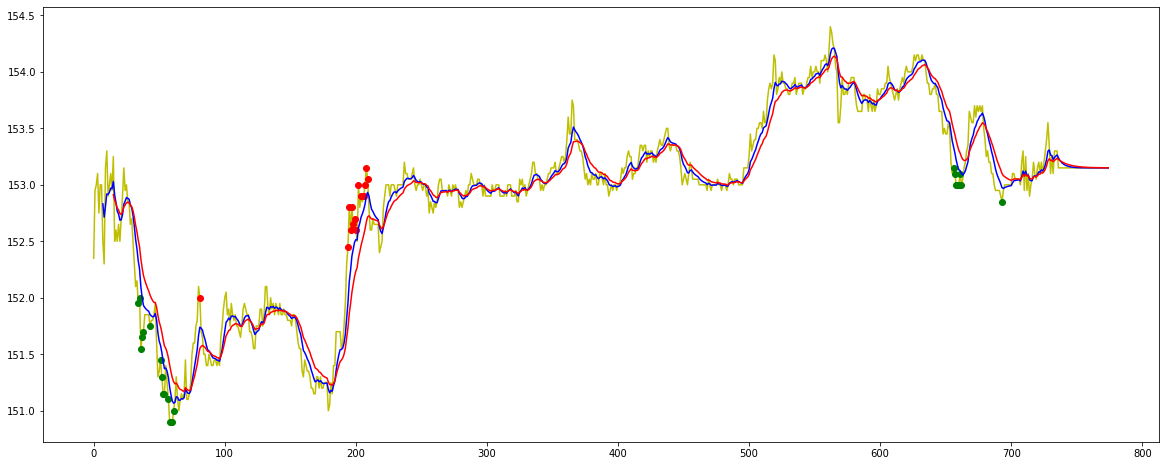

In [130]:
plt.figure(figsize=(20, 8))
plt.plot(close, c='y')
for i in range(0, len(close)-1):
    if rsi[i] <= 35 and scaled_trix[i] <=30 and scaled_mom[i] <= 45:
        plt.plot(i, close[i], c='g', marker='o')
    if rsi[i] >= 65 and scaled_trix[i] >= 70 and scaled_mom[i] >=55:
        plt.plot(i, close[i], c='r', marker='o')
        
shortWindow = talib.EMA(close, timeperiod=8)
longWindow = talib.EMA(close, timeperiod=16)

plt.plot(shortWindow, c='b')
plt.plot(longWindow, c='r')